# Modeling

In [1]:
filepath = 'C:/Users/Tim/Desktop/lighthouse/w11,12 - final project/'
data_filepath = filepath + 'data/'
final_data = 'final_df.csv'

import pandas as pd
import numpy as np
import copy
import seaborn as sns

In [55]:
df = pd.read_csv(data_filepath + final_data)
df.head()

,player,date,team,team_rounds,opposing_team,opposing_team_rounds,map,kills,deaths,differential,...,team_rank,kdr,kpr,n_impact,performance,rank_differential,rank_weight,w_performance,perf_resid,perf_resid_lag
0,s1mple,2020-02-29,Natus Vincere,16,Astralis,5,nuke,18,11,7,...,6,1.636364,0.857143,0.330758,1.850758,-5,1.5,2.776137,1.256137,1.256137
1,s1mple,2020-02-29,Natus Vincere,16,Astralis,5,d2,25,11,14,...,6,2.272727,1.190476,0.330758,2.420758,-5,1.5,3.631137,1.541137,1.256137
2,electronic,2020-02-29,Natus Vincere,16,Astralis,5,nuke,22,5,17,...,6,4.400000,1.047619,0.165008,2.025008,-5,1.5,3.037512,1.177512,1.177512
3,electronic,2020-02-29,Natus Vincere,16,Astralis,5,d2,15,11,4,...,6,1.363636,0.714286,0.165008,1.325008,-5,1.5,1.987512,0.827512,1.177512
4,flamie,2020-02-29,Natus Vincere,16,Astralis,5,nuke,23,10,13,...,6,2.300000,1.095238,-0.036592,1.753408,-5,1.5,2.630112,0.840112,0.840112


In [56]:
df['date'] = pd.to_datetime(df.date)
df = df.replace([np.inf, -np.inf], np.nan).dropna()
df = df[df['team']!='Sprout']

In [57]:
def info(x):
    n_missing = x.isnull().sum().sort_values(ascending=False)
    p_missing = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    inf = x.isin([np.inf, -np.inf]).sum().sort_values(ascending=False)
    dtype = x.dtypes
    count = x.count()
    missing_ = pd.concat([n_missing, p_missing, inf, dtype, count],axis=1, keys = [
        'number_missing',
        'percent_missing',
        'contains_inf',
        'type',
        'count'
    ])
    return missing_
info(df)

,number_missing,percent_missing,contains_inf,type,count
player,0,0.0,0,object,28293
date,0,0.0,0,datetime64[ns],28293
perf_resid,0,0.0,0,float64,28293
w_performance,0,0.0,0,float64,28293
rank_weight,0,0.0,0,float64,28293
rank_differential,0,0.0,0,int64,28293
performance,0,0.0,0,float64,28293
n_impact,0,0.0,0,float64,28293
kpr,0,0.0,0,float64,28293
kdr,0,0.0,0,float64,28293


<AxesSubplot:>

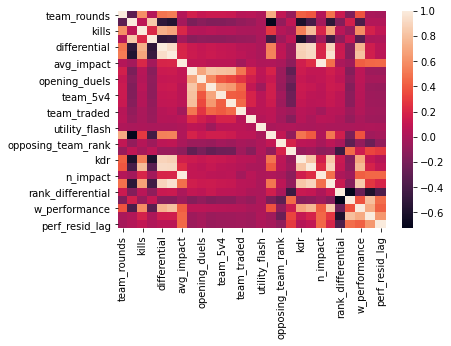

In [58]:
dfcorr = df.corr()
sns.heatmap(dfcorr)

In [59]:
cd = df.groupby('team').mean()['kdr']
cd = cd.reset_index()
cd.columns = ['team','mean_team_kdr']
cd

,team,mean_team_kdr
0,100 Thieves,1.045660
1,?,1.000120
2,AVANGAR,0.845461
3,Ancient,1.661427
4,Aristocracy,0.968922
5,Astralis,1.264710
6,CLG,0.994357
7,Cloud9,1.137227
8,Complexity,1.029576
9,Conquest,0.840929


In [60]:
df = df.merge(cd, on=['team'], how='left')

In [61]:
td = df.groupby('team').mean()['kpr']
td = td.reset_index()
td.columns = ['team','mean_team_kpr']
td

,team,mean_team_kpr
0,100 Thieves,0.662382
1,?,0.623909
2,AVANGAR,0.543806
3,Ancient,0.861527
4,Aristocracy,0.644173
5,Astralis,0.714223
6,CLG,0.689651
7,Cloud9,0.687866
8,Complexity,0.652444
9,Conquest,0.621658


In [62]:
df = df.merge(td, on=['team'], how='left')

In [63]:
df.to_csv(data_filepath+'final_model_df.csv')

## Machine Learning

In [46]:
# try 1
# features = [
#     'team',
#     'target',
#     'kdr', # weighting kills against deaths - direct performance measure
#     'kpr', # weighting kills against how long game is (longer = more)
#     # 'rank_differential',
#     # 'performance', # shouldnt use rank differential here since it biases players against better teams
#     # instead we should use weighted performance and see how performing against different ranked teams affects performance of players
#     'w_performance',
#     'perf_resid',
#     'perf_resid_lag',
#     'utility_flash',
#     'utility_adr',
#     'team_traded',
#     'team_4v5',
#     'team_5v4'
# ]    

# try 2
drop=['target',
#       'opposing_team',
      'player',
      'date',
      'kills',
      'deaths',
      'kdr',
      'kpr',
#       'mean_team_kdr',
#       'mean_team_kpr',
#       'w_performance',
#       'perf_resid_lag',
#       'perf_resid',
      'n_impact',
      'rank_weight',
      'team_rank',
      'opposing_team_rank',
      'p_rounds_won',
#       'opening_duels',
#       'multi_kills',
      'avg_impact',
      'differential',
      'rating',
      'team_rounds',
      'opposing_team_rounds'
]
df = df.sample(frac=1)
# data = df[features]
X = df.drop(columns=drop)
y = df['target']

In [47]:
# try knn, svm, log reg, random forest, xgboost
from numpy import sort
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [48]:
X = pd.get_dummies(X)

In [49]:
info(X)

,number_missing,percent_missing,contains_inf,type,count
opening_duels,0,0.0,0,float64,28293
opposing_team_Orbit,0,0.0,0,uint8,28293
opposing_team_Millenium,0,0.0,0,uint8,28293
opposing_team_Misfits,0,0.0,0,uint8,28293
opposing_team_NIP,0,0.0,0,uint8,28293
...,...,...,...,...,...
opposing_team_Arcade,0,0.0,0,uint8,28293
opposing_team_Aristocracy,0,0.0,0,uint8,28293
opposing_team_Astralis,0,0.0,0,uint8,28293
opposing_team_BIG,0,0.0,0,uint8,28293


In [50]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=123)

In [51]:
numerical = list(X.dtypes[X.dtypes != 'object'].index)

categorical = list(X.dtypes[X.dtypes == 'object'].index)

In [52]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

model = XGBClassifier(# objective ='reg:squaredlogerror',
                     # objective = 'reg:logistic',
                     objective = 'binary:logistic',
                     eval_metric = 'logloss',
                     use_label_encoder=False,
                     booster='gbtree',
                     learning_rate = 0.3,
                     colsample_bytree = 1,
                     max_depth = 10, 
                     alpha = 5,
                     n_estimators = 200)
model.fit(x_train,y_train)

train_score = cross_val_score(model,x_train,y_train,cv=10)
print(f'Train Score:\t{train_score.mean()}\nTScore STD:\t {train_score.std()}')

Train Score:	0.8181782744150234
TScore STD:	 0.007779227455669459


In [53]:
y_pred = model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %f" % (acc))
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.828464
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      3767
           1       0.84      0.85      0.85      4721

    accuracy                           0.83      8488
   macro avg       0.83      0.83      0.83      8488
weighted avg       0.83      0.83      0.83      8488



In [54]:
param_grid = {
    'lambda': [0,0.1,0.3,1],
    'alpha': [0,0.1,0.3,1],
    'learning_rate': [0.03,0.1,0.3],
    'max_depth': [3,5,10],
    'n_estimators': [50,100,150,200]
}

rs = RandomizedSearchCV(model, 
                        param_distributions=param_grid,
                        cv=5,
                        n_jobs=-1,
                        verbose=1)
rs.fit(x_train, y_train)

best_hyperparams = rs.best_params_
best_acc = rs.score(x_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best test set accuracy: 0.8284637134778511
Achieved with hyperparameters: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.3, 'lambda': 0.1, 'alpha': 0.3}


In [18]:
# from sklearn.feature_selection import SelectFromModel

# # select features using threshold
# selection = SelectFromModel(model, prefit=True)
# select_X_train = selection.transform(x_train)
# # train model
# selection_model = XGBClassifier(objective ='reg:squaredlogerror',
#                     # objective = 'reg:logistic',
#                     # objective = 'binary:logistic',
#                     use_label_encoder=False,
#                     booster='gbtree',
#                     learning_rate = 0.03,
#                     max_depth = 10, 
#                     alpha = 10,
#                     n_estimators = 100)
# selection_model.fit(select_X_train, y_train)

# select_X_test = selection.transform(x_test)
# y_pred = selection_model.predict(select_X_test)
# print(metrics.accuracy_score(y_test,y_pred))

In [ ]:
# done on google colab

# paramgrid = {
#     'objective': ['reg:logistic','binary:logistic'],
#     'lambda': [0,0.1,0.3,1],
#     'alpha': [0,0.1,0.3,1],
#     'learning_rate': [0.01,0.03,0.1,0.3],
#     'max_depth': [3,5,10],  
#     'n_estimators': [100,300,500]
# }
# n = 5

# scoring = {
#     'AUC': 'roc_auc', 
#     'Accuracy': metrics.make_scorer(metrics.accuracy_score)
# }

# grid = GridSearchCV(estimator=model, 
#                     param_grid=paramgrid, 
#                     cv=n, 
#                     scoring=scoring,
#                     refit='AUC',
#                     verbose=1, 
#                     n_jobs=-1)
# grid_result = grid.fit(x_train,y_train)

# results = grid_result.cv_results_

# best_score = grid_result.best_score_
# print(f'The best hyperparameter settings achieve a cross-validated AUC of: {best_score}')
# print(grid_result.best_params_)

In [64]:
b_model = XGBClassifier(# objective ='reg:squaredlogerror',
                     # objective = 'reg:logistic',
                     objective = 'binary:logistic',
                     eval_metric = 'logloss',
                     use_label_encoder=False,
                     booster='gbtree',
                     learning_rate = 0.3,
                     colsample_bytree = 1,
                     max_depth = 10, 
                     alpha = 0,
                     n_estimators = 200)
b_model.fit(x_train,y_train)
train_score = cross_val_score(model,x_train,y_train,cv=10)
print(f'Train Score:\t{train_score.mean()}\nTScore STD:\t {train_score.std()}')

y_pred = b_model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %f" % (acc))

Train Score:	0.8181782744150234
TScore STD:	 0.007779227455669459
Accuracy: 0.830231


In [66]:
b_model.save_model('xgboost_model.json')

In [20]:
# code adaboost
from sklearn.ensemble import AdaBoostClassifier

In [24]:
model_ada = AdaBoostClassifier(n_estimators=200,
                              learning_rate=0.1)
model_ada.fit(x_train,y_train)

ada_train_score = cross_val_score(model_ada,x_train,y_train,cv=10)
print(f'Train Score:\t{ada_train_score.mean()}\nTScore STD:\t {ada_train_score.std()}')

Train Score:	0.7570819247497693
TScore STD:	 0.007592661845117001


In [23]:
y_pred = model_ada.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %f" % (acc))
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.758247
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      3780
           1       0.77      0.81      0.79      4708

    accuracy                           0.76      8488
   macro avg       0.76      0.75      0.75      8488
weighted avg       0.76      0.76      0.76      8488



In [87]:
[i for i in df.columns]

['player',
 'date',
 'team',
 'team_rounds',
 'opposing_team',
 'opposing_team_rounds',
 'map',
 'kills',
 'deaths',
 'differential',
 'rating',
 'avg_impact',
 'p_rounds_won',
 'opening_duels',
 'multi_kills',
 'team_5v4',
 'team_4v5',
 'team_traded',
 'utility_adr',
 'utility_flash',
 'target',
 'opposing_team_rank',
 'team_rank',
 'kdr',
 'kpr',
 'n_impact',
 'performance',
 'rank_differential',
 'rank_weight',
 'w_performance',
 'perf_resid',
 'perf_resid_lag',
 'mean_team_kdr',
 'mean_team_kpr']

In [89]:
team = [
    'p_rounds_won',
    'opening_duels',
    'multi_kills',
    'team_5v4',
    'team_4v5',
    'team_traded',
    'utility_adr',
    'utility_flash'
]

In [90]:
y = df['performance']
x = df[team]
x

,p_rounds_won,opening_duels,multi_kills,team_5v4,team_4v5,team_traded,utility_adr,utility_flash
0,0.559,0.546,0.87,0.745,0.336,0.192,22.0,0.25
1,0.559,0.546,0.87,0.745,0.336,0.192,22.0,0.25
2,0.559,0.546,0.87,0.745,0.336,0.192,22.0,0.25
3,0.559,0.546,0.87,0.745,0.336,0.192,22.0,0.25
4,0.559,0.546,0.87,0.745,0.336,0.192,22.0,0.25
...,...,...,...,...,...,...,...,...
28288,0.505,0.486,0.81,0.734,0.290,0.207,16.2,0.14
28289,0.505,0.486,0.81,0.734,0.290,0.207,16.2,0.14
28290,0.556,0.544,0.89,0.757,0.318,0.249,16.9,0.23
28291,0.553,0.526,0.88,0.782,0.297,0.227,16.5,0.17


In [91]:
import statsmodels.api as sm
x = sm.add_constant(x)
lr = sm.OLS(y,x)
result = lr.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            performance   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     98.98
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          2.50e-163
Time:                        16:03:31   Log-Likelihood:                -11589.
No. Observations:               28293   AIC:                         2.320e+04
Df Residuals:                   28284   BIC:                         2.327e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4399      0.308      1.430

In [92]:
y2 = df['target']
import statsmodels.api as sm
x = sm.add_constant(x)
log = sm.Logit(y2,x)
result2 = log.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.668735
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                28293
Model:                          Logit   Df Residuals:                    28284
Method:                           MLE   Df Model:                            8
Date:                Mon, 22 Mar 2021   Pseudo R-squ.:                 0.02702
Time:                        16:04:56   Log-Likelihood:                -18921.
converged:                       True   LL-Null:                       -19446.
Covariance Type:            nonrobust   LLR p-value:                1.569e-221
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.4016      1.742     -2.526      0.012      -7.817      -0.986
p_rounds_won     10.